**Build our first neural network in Keras for image classification problem**

We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below

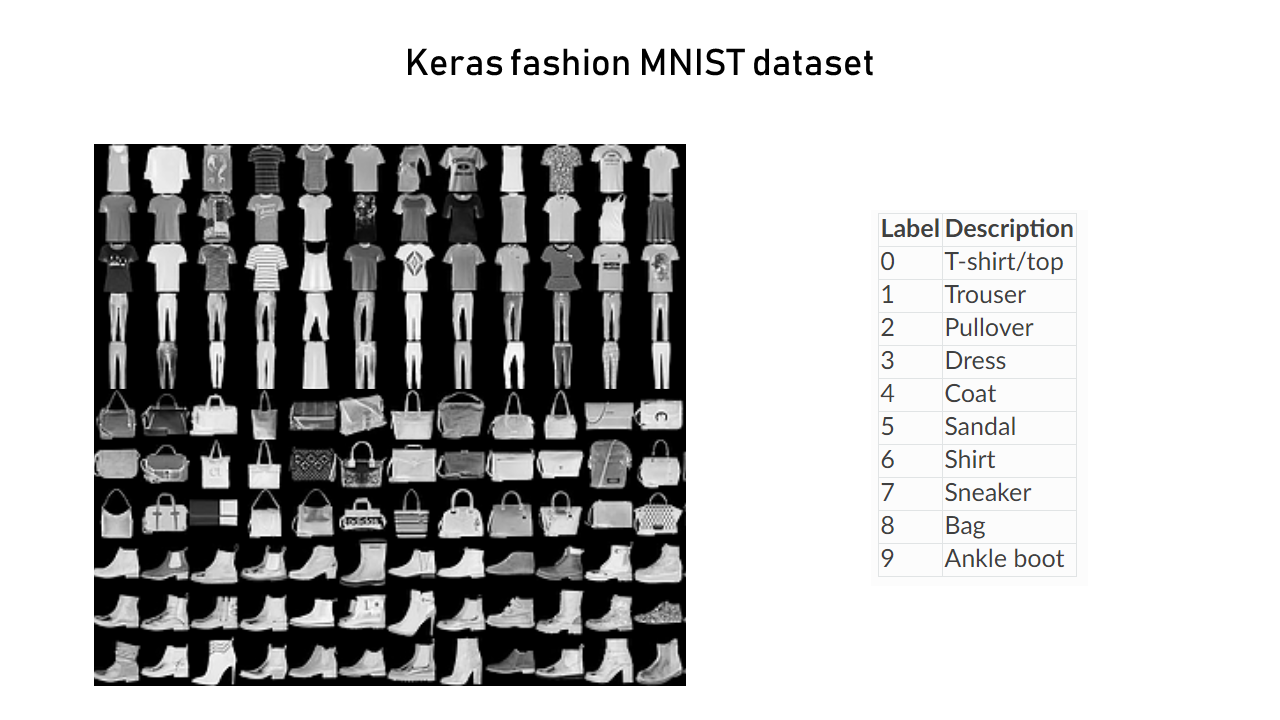

**Each image is 28 x 28 pixel in dimension** 

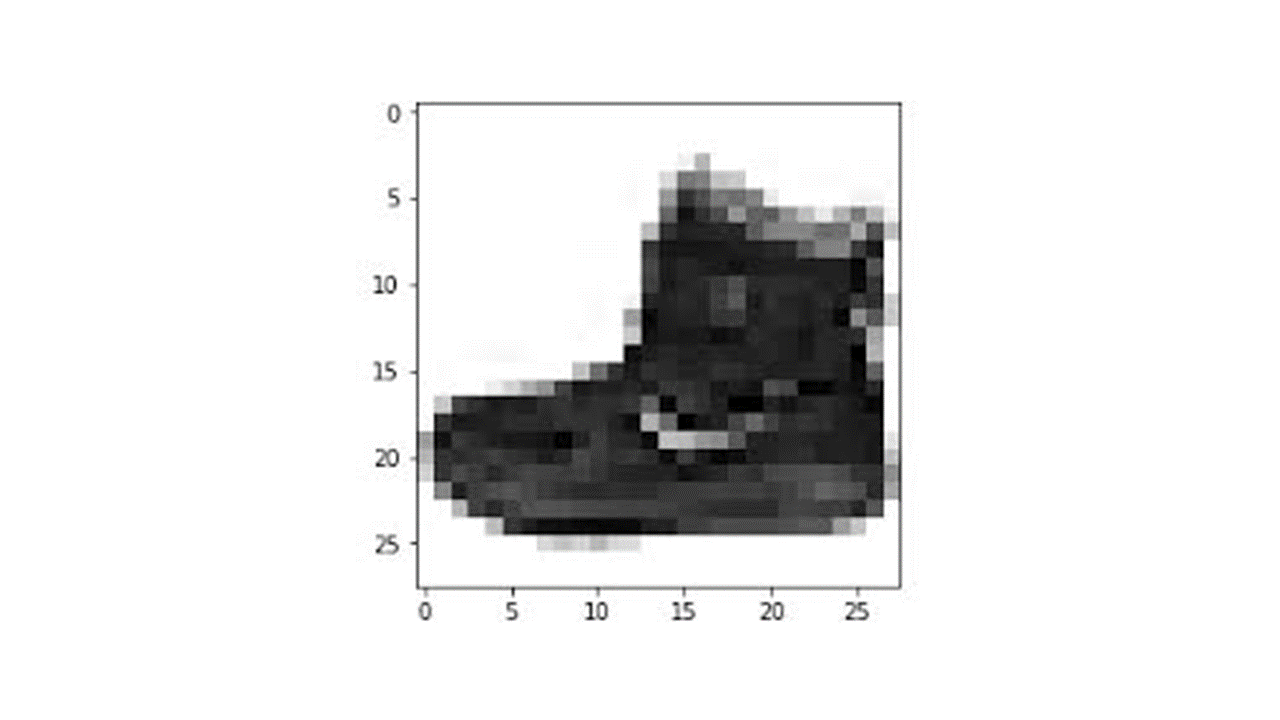

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
%matplotlib inline

In [8]:
keras.backend.backend()

'tensorflow'

In [9]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
len(X_train)

60000

In [11]:
X_train.shape

(60000, 28, 28)

In [13]:
len(X_test)

10000

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

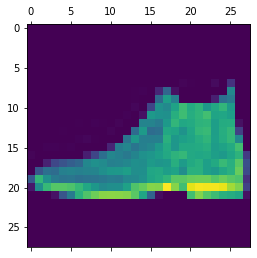

In [17]:
plt.matshow(X_test[0])

Normalize training data before training the neural 

In [19]:
X_train=X_train/255
X_test=X_test/255

Now build the Sequential Model and add layers into it

In [25]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation

model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

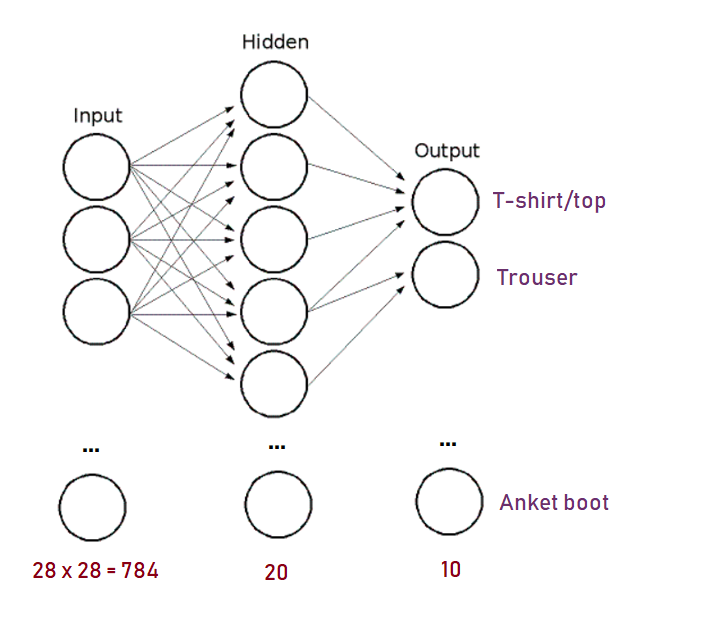

In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5064 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8619
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3437 - accuracy: 0.8746
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3202 - accuracy: 0.8816
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3013 - accuracy: 0.8892


In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8736


[0.35380426049232483, 0.8736000061035156]

In [29]:
y_predict=model.predict(X_test)

In [31]:
np.argmax(y_predict[0])

9

In [32]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [34]:
class_labels[np.argmax(y_predict[0])]

'Ankle boot'

Text(69.0, 0.5, 'True')

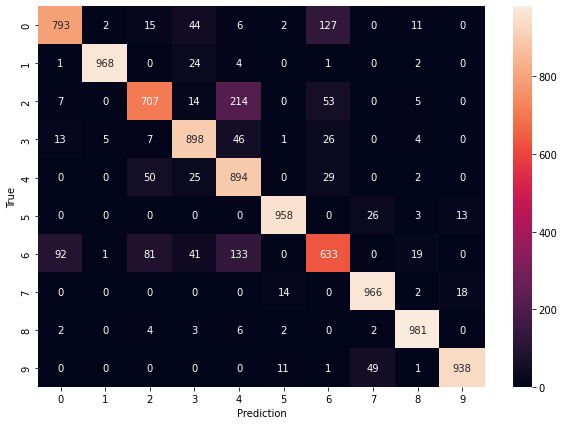

In [37]:
import tensorflow as tf
yPredictLabels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=yPredictLabels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel("True")

